# Analyze the results from calculating background numbers

## July 15th

I performed a scan (~1000 times) scrambling the position of the source for a fixed SNR cut (starting with diffuse cut), and calculated the number of events that passed all cuts, then this result was averaged by the number of times the scrambling was done. We'd like to lower the SNR cut until we get a number of backgrounds similar to that obtained in the diffuse analysis.

In [1]:
import sys
sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd

Welcome to JupyROOT 6.18/04


In [4]:
#colNames = ["phi", 'theta', '20.6', '20.4', '20.2', '20.0', '19.8', '19.6']
# colNames = ["phi", 'theta', '19.5', '19', '18.5', '18', '17.5', '17']
colNames = ["phi", 'theta', '19', '18.9', '18.8', '18.7', '18.6', '18.5']

SNR = pd.read_csv("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/files/source_optimization/bkg_random_SNR_scan_fine_config3.csv", names=colNames)
SNR = SNR.dropna()
SNR

,phi,theta,19,18.9,18.8,18.7,18.6,18.5
0,-6.454,-48.382,0,0,0,0,0,0
1,-167.075,36.611,0,0,0,0,0,0
2,36.075,31.286,0,0,0,0,0,0
3,159.267,-15.855,0,0,0,0,0,0
4,128.002,-68.619,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1000,34.023,16.223,0,0,0,0,0,0
1001,9.403,-66.639,0,0,0,0,0,0
1002,-132.452,12.438,0,0,0,0,0,0
1003,-37.289,-88.418,0,0,0,0,0,0


In [18]:
bkg = SNR.mean()
bkg = bkg[2:]
bkg = bkg.sort_index()
bkg = pd.DataFrame(bkg, columns=["bkg"])
bkg.reset_index(level=0, inplace=True)
bkg["snr"] = bkg["index"]
bkg

,index,bkg,snr
0,18.5,0.272727,18.5
1,18.6,0.090909,18.6
2,18.7,0.090909,18.7
3,18.8,0.000000,18.8
4,18.9,0.000000,18.9
5,19,0.000000,19


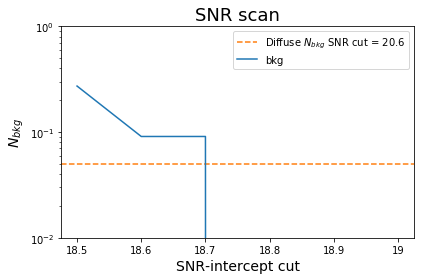

In [20]:
plt.axhline(5E-2, ls="--", c="C1", label="Diffuse $N_{bkg}$ SNR cut = 20.6")
# plt.axvline(20.6, ls="--", c="C2", label="Diffuse SNR cut")

plt.plot(bkg.snr, bkg.bkg)
plt.yscale('log')
plt.ylim(0.01,1)
plt.xlabel("SNR-intercept cut", fontsize=14)
plt.ylabel("$N_{bkg}$", fontsize=14)
plt.title("SNR scan",fontsize=18)
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/scan_yinterc_scrambled_source.png", dpi=150)

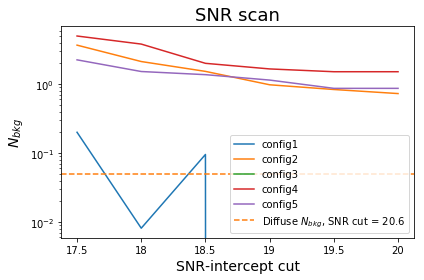

In [3]:
#colNames = ["phi", 'theta', '20.6', '20.4', '20.2', '20.0', '19.8', '19.6']
# colNames = ["phi", 'theta', '19.5', '19', '18.5', '18', '17.5', '17']
colNames = ["phi", 'theta', '19', '18.9', '18.8', '18.7', '18.6', '18.5']
colNames = ["phi", 'theta', "20", "19.5", "19", "18.5", "18", "17.5"]

for i in range(1,6):
    SNR = pd.read_csv("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/files/source_optimization/bkg_random_SNR_scan_fine_config%i.csv"%i, names=colNames)
    SNR = SNR.dropna()

    bkg = SNR.mean()
    bkg = bkg[2:]
    bkg = bkg.sort_index()
    bkg = pd.DataFrame(bkg, columns=["bkg"])
    bkg.reset_index(level=0, inplace=True)
    bkg["snr"] = bkg["index"]

    # plt.axvline(20.6, ls="--", c="C2", label="Diffuse SNR cut")

    plt.plot(bkg.snr, bkg.bkg, label="config%i"%i)
plt.axhline(5E-2, ls="--", c="C1", label="Diffuse $N_{bkg}$, SNR cut = 20.6")

plt.yscale('log')
# plt.ylim(0.01,10)
plt.xlabel("SNR-intercept cut", fontsize=14)
plt.ylabel("$N_{bkg}$", fontsize=14)
plt.title("SNR scan",fontsize=18)
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/scan_yinterc_scrambled_source_allConfigs.png", dpi=150)

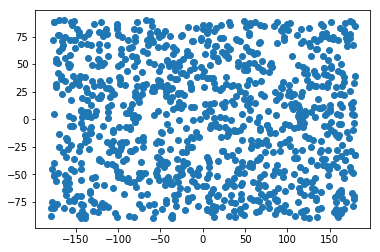

In [5]:
plt.scatter(SNR.phi, SNR.theta)